### Research Report  for following categories of diagnosis:



Atelectasis, Cardiomegaly, Consolidation, Edema, Effusion, Emphysema, Fibrosis, Infiltration, Mass, Nodule, Pneumonia, Pneumothorax, Pleural, No Findings
# #	Dataset: https://www.kaggle.com/khanfashee/nih224folderwise-data

Downloaded the data set using Kaggle API in our Colab file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload() #this will prompt you to upload the kaggle.json



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kreetss","key":"d47930896b03fe2edd7eb1847ff23c2f"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Apr 25 22:21 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [ ]:
!chmod 600 /root/.kaggle/kaggle.json



In [ ]:
!pwd



/content


In [ ]:
!kaggle datasets download -d khanfashee/nih224folderwise-data



 99% 2.86G/2.87G [00:24<00:00, 191MB/s]
100% 2.87G/2.87G [00:24<00:00, 126MB/s]


In [ ]:
!unzip nih224folderwise-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00010936_008.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00010936_010.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00011460_053.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00012687_007.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00014839_014.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00016051_015.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00016051_017.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00016051_018.png  
  inflating: Nih All d/Pneumothorax/Atelectasis.Emphysema.Infiltration.Pneumothorax.00018860_029.png  
  inflating: Nih All d

***IMPORTS***

In [ ]:
import os
from PIL import Image
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import StratifiedKFold


# Reading the dataset

In [ ]:
# 2. Read images.
# Creates three tables:
# Table 1: disease_name -> disease_idx.
# Tabel 2: image (numpy_array) -> label

def load_images(directory):
    disease_to_idx = {}
    img_to_label = {}
    id_to_label = {}
    id_to_img = {}
    # Get list of subdirectories (disease names)
    dirs = sorted(os.listdir(directory))
    diseases = [d for d in dirs if (not d.startswith('.'))]
    # Iterate over each subdirectory
    for disease_idx, disease in enumerate(diseases):
        print("Processing disease: " + disease)
        disease_to_idx[disease] = disease_idx
        disease_dir = os.path.join(directory, disease)
        # Check if it's a directory
        if os.path.isdir(disease_dir):
            # List all files in the subdirectory
            files = os.listdir(disease_dir)
            num_files_processed = 0
            # Iterate over each image file
            for file in files:
                if (random.random() > 0.9):
                    continue
                filename = '.'.join(file.strip().split('/')[-1].split('.')[:-1])
                # Check if it's a PNG file
                if file.endswith('.png'):
                    # Load image using PIL
                    img_path = os.path.join(disease_dir, file)
                    with Image.open(img_path) as img:
                        img_array = np.array(img.convert('L'))
                        if img_array.shape != (224, 224):
                            continue
                        id_to_img[filename] = img_array
                    # Convert label to binary vector
                    binary_vector = np.zeros(len(diseases), dtype=int)
                    if filename in id_to_label:
                        binary_vector = id_to_label[filename]
                    binary_vector[disease_idx] = 1
                    # Add image and binary vector to the dictionary
                    id_to_label[filename] = binary_vector
                num_files_processed += 1
                if (num_files_processed % 1000 == 0):
                    print("num_files_processed = " + str(num_files_processed))
    img_to_label = [[id_to_img[k], id_to_label[k]] for k in id_to_img if (k in id_to_label)]
    return disease_to_idx, img_to_label

# Path to the "nid" directory
directory = '/content/Nih All d/'
# Load images and create dictionary
disease_to_idx, img_to_label = load_images(directory)

Processing disease: Atelectasis
num_files_processed = 1000
num_files_processed = 2000
num_files_processed = 3000
num_files_processed = 4000
num_files_processed = 5000
num_files_processed = 6000
num_files_processed = 7000
num_files_processed = 8000
num_files_processed = 9000
num_files_processed = 10000
Processing disease: Cardiomegaly
num_files_processed = 1000
num_files_processed = 2000
Processing disease: Consolidation
num_files_processed = 1000
num_files_processed = 2000
num_files_processed = 3000
num_files_processed = 4000
Processing disease: Edema
num_files_processed = 1000
num_files_processed = 2000
Processing disease: Effusion
num_files_processed = 1000
num_files_processed = 2000
num_files_processed = 3000
num_files_processed = 4000
num_files_processed = 5000
num_files_processed = 6000
num_files_processed = 7000
num_files_processed = 8000
num_files_processed = 9000
num_files_processed = 10000
num_files_processed = 11000
Processing disease: Emphysema
num_files_processed = 1000
num

In [ ]:
# 2.1 Test the output.
print('Printing disease_to_idx:\n')
print(disease_to_idx)
print('\n\nTotal number of samples = ' + str(len(img_to_label)))
print('\n\nPrinting an element from img_to_label:\n')
print(img_to_label[0])

Printing disease_to_idx:

{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'No Finding': 10, 'Nodule': 11, 'Pleural': 12, 'Pneumonia': 13, 'Pneumothorax': 14}


Total number of samples = 102751


Printing an element from img_to_label:

[array([[  5,   7,   8, ...,  28,  25,  23],
       [  6,   9,   9, ...,  31,  28,  25],
       [  7,  10,  10, ...,  32,  28,  27],
       ...,
       [ 83, 122, 125, ..., 101,  97,  91],
       [ 85, 124, 127, ..., 104,  99,  94],
       [ 68, 100, 102, ...,  84,  80,  76]], dtype=uint8), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


# **PREPROCESSING**





In [ ]:
# 3. Split the data into train and test.
train_img_to_label, test_img_to_label = train_test_split(img_to_label, test_size=0.1, random_state=42)

In [ ]:
# 3.1 Test the output.
print('\nSize of train set = ' + str(len(train_img_to_label)))
print('\nSize of test set = ' + str(len(test_img_to_label)))
print('\nPrinting an element from the train set:\n')
print(train_img_to_label[0])
print('\nPrinting an element from the test set:\n')
print(test_img_to_label[0])


Size of train set = 92475

Size of test set = 10276

Printing an element from the train set:

[array([[ 14,  14,  14, ...,  21,  31,  47],
       [ 14,  14,  13, ...,  17,  25,  39],
       [ 14,  13,  13, ...,  16,  24,  38],
       ...,
       [ 64, 105, 125, ..., 127, 176, 192],
       [ 97, 138, 153, ..., 132, 178, 193],
       [135, 165, 175, ..., 135, 180, 195]], dtype=uint8), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

Printing an element from the test set:

[array([[  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   2,   2,   2],
       [  1,   1,   1, ...,   3,   3,   3],
       ...,
       [ 70,  84,  91, ..., 133, 130, 119],
       [ 68,  84,  91, ..., 133, 131, 120],
       [ 62,  76,  82, ..., 123, 120, 110]], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])]


#**Creating the x_train, y_train, x_test and y_test**



In [ ]:
# Create x_train, y_train, x_test and y_test.

# Convert training data to x_train and y_train
x_train = np.array([item[0] for item in train_img_to_label])  # Extract images
y_train = np.array([item[1] for item in train_img_to_label])  # Extract labels

# Reshape X_train to add a channel dimension for grayscale images
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

print("Shape of x_train:", x_train.shape)  # (2, 2, 2, 1) for this example
print("\n\nShape of y_train:", y_train.shape)  # (2, 3) for this example

# Convert training data to x_train and y_train
x_test = np.array([item[0] for item in test_img_to_label])  # Extract images
y_test = np.array([item[1] for item in test_img_to_label])  # Extract labels

# Reshape X_train to add a channel dimension for grayscale images
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print("\n\nShape of x_test:", x_test.shape)  # (2, 2, 2, 1) for this example
print("\n\nShape of y_test:", y_test.shape)  # (2, 3) for this example

Shape of x_train: (92475, 224, 224, 1)


Shape of y_train: (92475, 15)


Shape of x_test: (10276, 224, 224, 1)


Shape of y_test: (10276, 15)


In [ ]:
pip install --upgrade tensorflow


# **Image Augmentation**

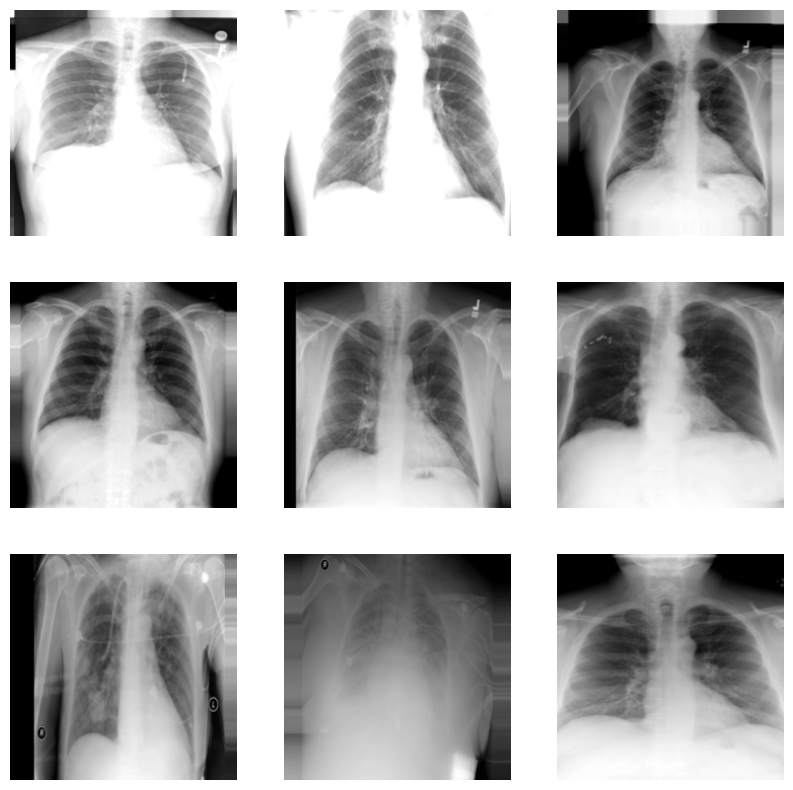

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming x_train is your training data
# Create an image augmentation object
datagen = ImageDataGenerator(
    brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
    zoom_range=0.2  # Randomly zoom images by 20%
)

# Fit the augmentation object to the training data
datagen.fit(x_train)

# Generate a batch of augmented images
augmented_images = next(datagen.flow(x_train, batch_size=9))

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].reshape(224, 224), cmap='gray')  # Assuming image size is 224x224
    plt.axis('off')

plt.show()


#**Hyperparameter tuning**
#**Model Creation**


In [ ]:
# Create model.
img_height, img_width, img_channels = 224, 224, 1
num_classes = 15
input_shape = (img_height, img_width, img_channels)
epochs = 100

# Define custom model class
class CustomModel(keras.Model):
    def __init__(self, num_layers=2, filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dropout_rate=0.5, optimizer='adam', learning_rate=0.001, **kwargs):
        super().__init__(**kwargs)
        self.num_layers = num_layers
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.dropout_rate = dropout_rate
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.build_model()

    def build_model(self):
        self.model = keras.Sequential()
        self.model.add(Conv2D(self.filters, kernel_size=self.kernel_size, strides=self.strides, padding=self.padding, activation='relu', input_shape=(img_height, img_width, img_channels)))
        self.model.add(MaxPooling2D((2, 2)))

        for _ in range(self.num_layers - 1):
            self.model.add(Conv2D(self.filters, kernel_size=self.kernel_size, strides=self.strides, padding=self.padding, activation='relu'))
            self.model.add(MaxPooling2D((2, 2)))

        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(num_classes, activation='sigmoid'))

        if self.optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=self.learning_rate)
        elif self.optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=self.learning_rate)
        else:
            raise ValueError("Invalid optimizer specified")

        self.model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    def call(self, inputs):
        return self.model(inputs)

    def fit(self, X, y, epochs=100, batch_size=32, **kwargs):
        return self.model.fit(X, y, epochs=epochs, batch_size=batch_size, **kwargs)

#underfitting and overfitting prevention

Epoch 1/10
2890/2890 [==============================] - 19s 6ms/step - loss: 0.3785 - accuracy: 0.5124 - val_loss: 0.2169 - val_accuracy: 0.5251
Epoch 2/10
2890/2890 [==============================] - 16s 6ms/step - loss: 0.2173 - accuracy: 0.5284 - val_loss: 0.2168 - val_accuracy: 0.5251
Epoch 3/10
2890/2890 [==============================] - 16s 6ms/step - loss: 0.2159 - accuracy: 0.5284 - val_loss: 0.2168 - val_accuracy: 0.5251
Epoch 4/10
2890/2890 [==============================] - 16s 6ms/step - loss: 0.2149 - accuracy: 0.5282 - val_loss: 0.2172 - val_accuracy: 0.5252
Epoch 5/10
2890/2890 [==============================] - 16s 6ms/step - loss: 0.2131 - accuracy: 0.5279 - val_loss: 0.2159 - val_accuracy: 0.5242
Epoch 6/10
2890/2890 [==============================] - 16s 6ms/step - loss: 0.2109 - accuracy: 0.5287 - val_loss: 0.2171 - val_accuracy: 0.5226
Epoch 7/10
2890/2890 [==============================] - 16s 6ms/step - loss: 0.2072 - accuracy: 0.5310 - val_loss: 0.2172 - val_ac

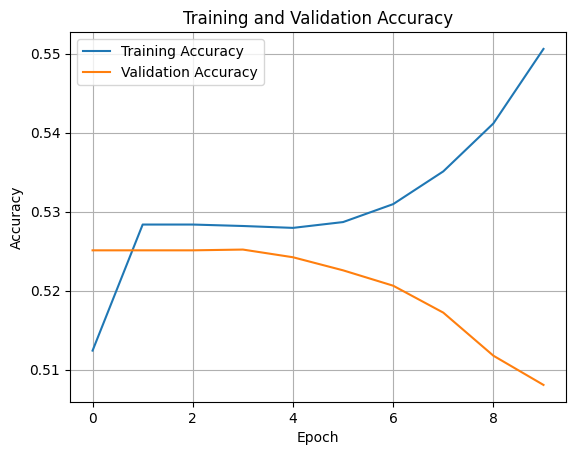

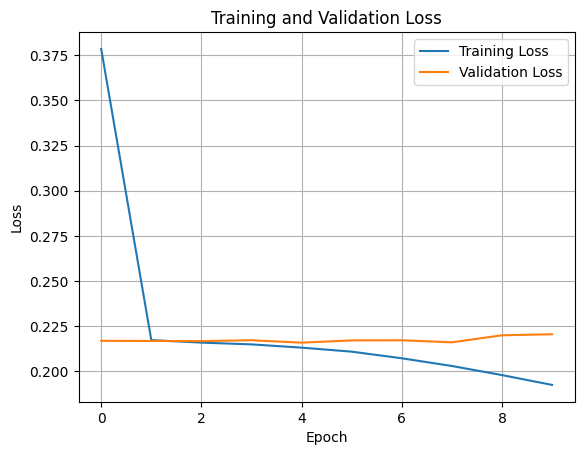

In [ ]:
# Create an instance of CustomModel
custom_model = CustomModel()

# Initialize parameters
epochs = 10
batch_size = 32

# Initialize early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model
history = custom_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

#**K**-**Fold** **Cross Validation**

Fold 1/5
Epoch 1/10
2312/2312 [==============================] - 17s 7ms/step - loss: 0.5762 - accuracy: 0.5092 - val_loss: 0.2122 - val_accuracy: 0.5338
Epoch 2/10
2312/2312 [==============================] - 14s 6ms/step - loss: 0.2181 - accuracy: 0.5275 - val_loss: 0.2125 - val_accuracy: 0.5338
Epoch 3/10
2312/2312 [==============================] - 14s 6ms/step - loss: 0.2168 - accuracy: 0.5273 - val_loss: 0.2128 - val_accuracy: 0.5338
Epoch 4/10
2312/2312 [==============================] - 14s 6ms/step - loss: 0.2163 - accuracy: 0.5272 - val_loss: 0.2134 - val_accuracy: 0.5334
Epoch 5/10
2312/2312 [==============================] - 14s 6ms/step - loss: 0.2151 - accuracy: 0.5274 - val_loss: 0.2135 - val_accuracy: 0.5326
Epoch 6/10
2312/2312 [==============================] - 14s 6ms/step - loss: 0.2140 - accuracy: 0.5278 - val_loss: 0.2147 - val_accuracy: 0.5326
Epoch 6: early stopping
322/322 [==============================] - 1s 3ms/step - loss: 0.2163 - accuracy: 0.5251
Fold 2/5

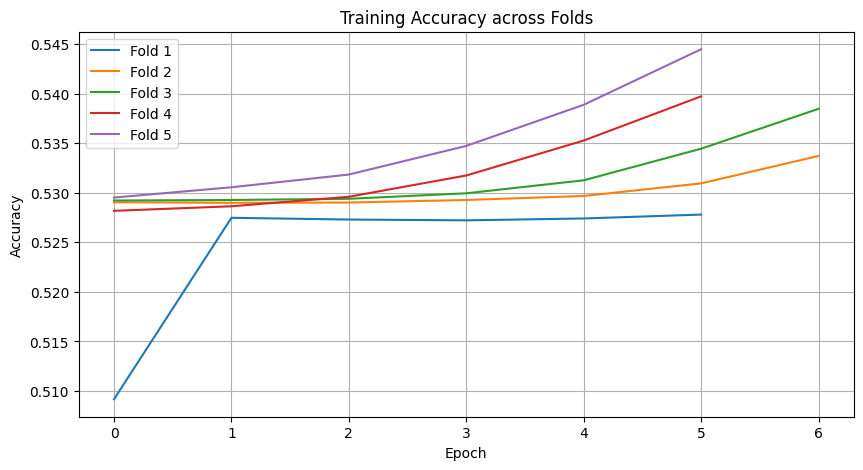

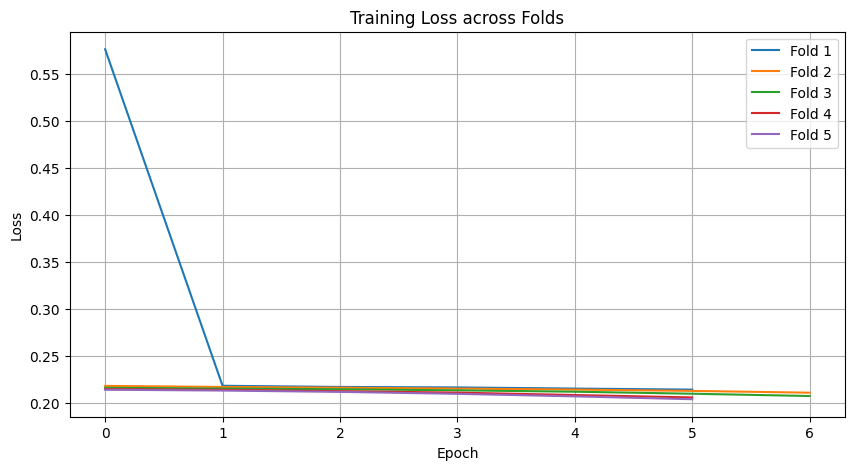

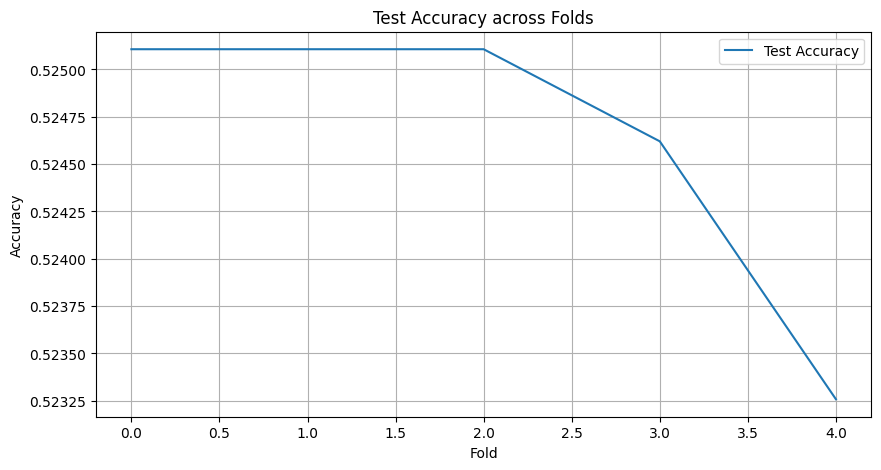

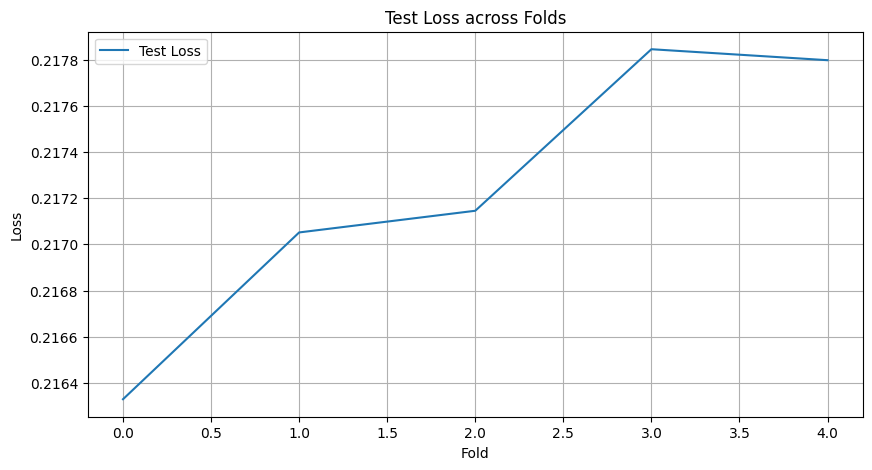

In [ ]:
num_folds = 5  # Number of folds for k-fold cross-validation

# Initialize lists to store fold-wise results
fold_histories = []

# Initialize lists to store test accuracy and loss for each fold
test_accuracy_per_fold = []
test_loss_per_fold = []

# Create k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=False)

# Create an instance of CustomModel for each fold
custom_model = CustomModel()
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Iterate over the folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(x_train)):
    print(f"Fold {fold + 1}/{num_folds}")

    # Initialize early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

    # Train the model for this fold
    history = custom_model.fit(x_train[train_indices], y_train[train_indices], epochs=epochs, batch_size=batch_size,
                               callbacks=[early_stopping], validation_data=(x_train[val_indices], y_train[val_indices]))

    # Append the fold history to the list
    fold_histories.append(history)

    # Evaluate the model on the test set and store accuracy and loss
   # test_loss, test_accuracy = custom_model.evaluate(x_test, y_test)
    test_results = custom_model.evaluate(x_test, y_test)

    # Extract the test loss and accuracy from the results tuple
    test_loss = test_results[0]
    test_accuracy = test_results[1]
    test_loss_per_fold.append(test_loss)
    test_accuracy_per_fold.append(test_accuracy)

# Plot training and validation accuracy across folds
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history.history['accuracy'], label=f'Fold {fold + 1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy across Folds')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss across folds
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history.history['loss'], label=f'Fold {fold + 1}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss across Folds')
plt.legend()
plt.grid(True)
plt.show()

# Plot test accuracy and loss for each fold
plt.figure(figsize=(10, 5))
plt.plot(test_accuracy_per_fold, label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Test Accuracy across Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_loss_per_fold, label='Test Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Test Loss across Folds')
plt.legend()
plt.grid(True)
plt.show()
